# LAB ASSIGNMENT 

**Name:** SHUBHADIP CHAKRABARTI

**Registration Number:** 19BAI1113

**Objectives:** 

    1. To Implement SVM Classification task on three different types of Datasets. The Three Datasets are:
        a. Medical Numerical Dataset (Binary Classification)
        b. Medical Image Dataset (Binary Classification)
        c. Facial Expression Recognition Dataset (Multiclass Classification)

**Datasets Used**: 

    The three datasets used in this Notebook, for the task of application of SVM Classifier are given below:
        1. Heart Attack Prediction Dataset (Numerical Dataset)
        2. Retinal Diseases Prediction Dataset (Image Dataset - 1000 Images from 39 different Retinal Diseases)
        3. Facial Expression Recognition Dataset (Image Dataset)

**Dataset Procurement Source:** All the datasets used in this notebook are procured from Kaggle Website 

### Importing Necessary Modules and Functions

In [1]:
#import OS
import os

#import numpy
import numpy as np

#import pandas
import pandas as pd

#import seaborn
import seaborn as sb

#import matplotlib
import matplotlib.pyplot as plt

#import train_test_split
from sklearn.model_selection import train_test_split

#import LinearSVC
from sklearn.svm import LinearSVC

#import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, log_loss, precision_recall_curve, f1_score, auc

#import OpenCV
import cv2

Having imported all the necessary functions into the Notebook, we now move on to the execution of the first task.

# TASK 1: SVM on Numerical Dataset (Medical Based)

## Importing Dataset into the Notebook

In [80]:
#importing dataset into the python notebook
df = pd.read_csv('C:\\Users\\admin\\Desktop\\Anaconda_Machine Learning\\Computer Vision in Healthcare Application\\Lab 6_SVM\\dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Understanding the Dataset

In [81]:
#get the first five rows of the dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [82]:
#shape of the dataset
df.shape

(299, 13)

We observe that the dataset has 299 rows and 13 columns

We now list out the 13 columns for gaining a better understanding on the input and target attributes

In [83]:
#list the columns of the dataset
column = list(df.columns)
column

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

We know that this dataset helps in predicting the chances of DEATH_EVENTS due to heart attacks. 
Since, the last column tells us about the DEATH_EVENT based on the values of the other attributes, so the last column must be the target attribute.

Hence, we conclude that the first 12 columns must be the input attributes and the 13th column (i.e., the DEATH_EVENT) must be the target attribute.

We now observe the datatypes of the columns in the dataset

In [84]:
#datatypes in the dataset
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

We observe that all the values in every column of the dataset is only numerical in nature. 

We now get an overview of the dataset

In [85]:
#describe the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [86]:
#describe the dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Let us now analyze the dataset in order to gain more necessary insights of the same.

## Analyzing the Dataset

In [87]:
#determine the number of null values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

We observe that there are no null values present in the dataset.

We now get the number of unique entries present in each column of the dataset.

In [88]:
#number of unique entries in each column
df.nunique(axis = 0)

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

## Visualization

We now visualize the amount of correlation between different attributes using the heatmap 

<AxesSubplot:>

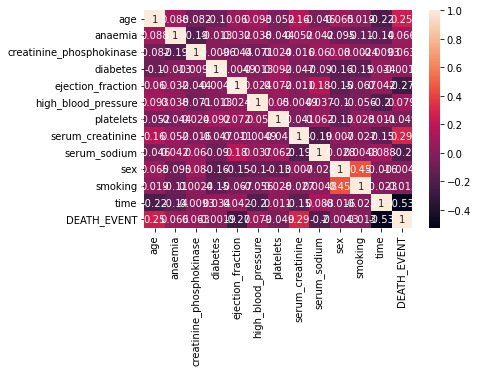

In [89]:
data_corr = df.corr()
sb.heatmap(data_corr,annot=True)

Having successfully analyzed the dataset, we now proceed to creating SVM Classifier Model for the given Dataset.

## Modelling

### Seperating the Input attributes from the Target attribute

In [106]:
#Split Input and Target Attributes
x = df.drop(['DEATH_EVENT'],axis=1)   #input attributes
y = df['DEATH_EVENT']                 #output column

### Analyzing the data splits created above

In [113]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [114]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [115]:
y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

### Train Test Split

We now split the dataset in 77:23 ratio between Train and Test set of the Dataset

In [117]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.23)

In [118]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(230, 12) (230,)
(69, 12) (69,)


We now successfully carry out Model Fitting task

### Model Fitting

In [119]:
#Modelling using Linear Support Vector Classifier 
linear_svm = LinearSVC()
linear_svm.fit(x_train, y_train)
y_pred = linear_svm.predict(x_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


We now test the performance of the Model

### Model Performance

In [120]:
#Accuracy
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Accuracy:  72.46376811594203


In [121]:
#Log Loss
print("Log loss: ",log_loss(y_test,y_pred))

Log loss:  9.51070073475599


In [122]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[50,  2],
       [17,  0]], dtype=int64)

In [123]:
#auc_score 
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
auc_score = auc(fpr,tpr)
auc_score

0.4807692307692308

## Inference

    As observed clearly from the results obtained above, the application of SVM Classifier on the taken dataset at 77:23 ratio (train:test) results in an accuracy of 72.46%.
    We also note that we obtain a Log Loss, AUC Score of 9.51 and 0.48 for the taken dataset.

We now implement SVM Classifier on Retinal Diseases Image Dataset

# TASK 2: SVM on Medical Image Dataset (Retinal Diseases)

## Importing the Dataset 

The Retinal Image Dataset considered in this exercise containes multiples classes in it.
As demanded in the Question, it is noted that we consider only two classes of the Retinal Image Dataset for this task. The two classes considered in this notebook are DR2 and Large optic cup.

In [124]:
#Importing the Dataset
#Path of the Dataset Folder
DATADIR = 'C:\\Users\\admin\\Desktop\\Anaconda_Machine Learning\\Computer Vision in Healthcare Application\\Lab 6_SVM\\dataset\\1000images'

#Different Classes in the Image Dataset
CATEGORIES = ['1.0.DR2','0.2.Large optic cup']

#Image Size Defined
IMG_SIZE=100

## Analyzing the Dataset

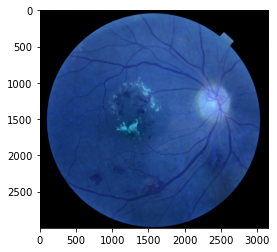

In [127]:
#Display an image
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

## Modelling

In [128]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [129]:
#total number of images
print(len(training_data))

99


In [130]:
lenofimage = len(training_data)

In [131]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [132]:
X.shape

(99, 30000)

In [133]:
X = X/255.0

In [134]:
X[1]

array([0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
       0.        ])

In [135]:
y=np.array(y)

In [136]:
y.shape

(99,)

### Train Test Split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Fitting the Model

In [138]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [139]:
y2 = svc.predict(X_test)

### Model Performance

In [140]:
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.96


## Inference

    We could successfully apply SVM Classifier Model on the Retinal Disease Image Dataset. 
    We observe that we could successfully obtain an accuracy of 96% on the two considered classes of the Retinal Disease Image Dataset

We now implement SVM on Face Expression Recognition Dataset

# TASK 3: SVM on Face Expression Recognition Dataset

## Importing the Dataset

We now import all the classes of the Face Expression Recognition Dataset and apply SVM Classifier Model on the same. 

In [152]:
#Import Dataset
#Path to the Face Expression Recognition Dataset
DATADIR = 'C:\\Users\\admin\\Desktop\\Anaconda_Machine Learning\\Computer Vision in Healthcare Application\\Lab 6_SVM\\face_detection\\images\\validation'

#The different classes of the Facial Recognition Dataset
CATEGORIES = ['angry','disgust','fear','happy','neutral','sad','surprise']

#Image Size Defined
IMG_SIZE=100

## Analyzing the Dataset

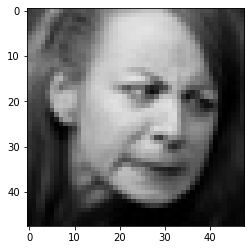

In [153]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

## Modelling

In [154]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [155]:
print(len(training_data))

7066


In [156]:
lenofimage = len(training_data)

In [157]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [158]:
X.shape

(7066, 30000)

In [159]:
X = X/255.0

In [160]:
X[1]

array([0.09019608, 0.09019608, 0.09019608, ..., 0.99215686, 0.99215686,
       0.99215686])

In [161]:
y=np.array(y)

In [162]:
y.shape

(7066,)

### Train Test Split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Fitting Model

In [164]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [165]:
y2 = svc.predict(X_test)

### Model Performance

In [166]:
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.300509337860781


## Inference

    We could successfully apply SVM Classifier Model on the Facial Expression Recognition Dataset
    We observe that we obtain an accuracy of 30.05% on the Facial Expression Recognition Image Dataset

## Conclusion

We could acheive the following objectives in this exercise

    1. Implementation of SVM Classification task on three different types of Datasets. The datasets were:
        a. Medical Numerical Dataset (Binary Classification)
        b. Retinal Disease Image Dataset (Binary Classification)
        c. Facial Expression Recognition Dataset (Multiclass Classification)
        
    2. After successful application of SVM Classifier Model, we could successfully achieve the following accuracies for the three datasets:
        a. Heart Attack Prediction Dataset (Numerical; Binary Classification) - 72.46%
        b. Retinal Disease Image Dataset (Binary Classification) - 96%
        c. Facial Expression Recognition Dataset (Multiclass Classification) - 30.05%